In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
from rdkit import Chem
import matplotlib.pyplot as plt
import networkx as nx
from karateclub import Graph2Vec


In [52]:
import gensim
gensim.__version__

'4.2.0'

In [53]:
df = pd.read_csv("data/processed/basic_data.csv")
df.head()
df.columns

Index(['cid', 'smiles', 'action', 'action_gen'], dtype='object')

In [54]:
df['mol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x)) 
df

,cid,smiles,action,action_gen,mol
0,2159,CCN1CCCC1CNC(=O)C2=CC(=C(C=C2OC)N)S(=O)(=O)CC,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x000001808C2...
1,2160,CN(C)CCC=C1C2=CC=CC=C2CCC3=CC=CC=C31,BINDER,OTHER,<rdkit.Chem.rdchem.Mol object at 0x000001808C2...
2,2562,CCN(CC)CCOCCOC(=O)C1(CCCC1)C2=CC=CC=C2,ANTAGONIST,ANTAGONIST,<rdkit.Chem.rdchem.Mol object at 0x000001808C2...
3,3345,CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x000001808C3...
4,3821,CNC1(CCCCC1=O)C2=CC=CC=C2Cl,BINDER,OTHER,<rdkit.Chem.rdchem.Mol object at 0x000001808C3...
...,...,...,...,...,...
166,132990963,C1CCC(CC1)N2CCN(CC2)C(CC3=CC=CC=C3)C4=CC=C(C=C4)F,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x000001808C3...
167,132990975,C1CCC(CC1)N2CCN(CC2)C(CC3=CC=CC=C3)C4=CC=CC=C4F,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x000001808C3...
168,134156377,CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC)O[C...,AGONIST,AGONIST,<rdkit.Chem.rdchem.Mol object at 0x000001808C3...
169,137434175,CCC1=CC2=C(C(=C(N=C2C(=C1)F)N3CCC(CC3)NC4CCOCC...,ANTAGONIST,ANTAGONIST,<rdkit.Chem.rdchem.Mol object at 0x000001808C3...


In [55]:
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   atomic_num=atom.GetAtomicNum(),
                   is_aromatic=atom.GetIsAromatic(),
                   atom_symbol=atom.GetSymbol())
        
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType())
        
    return G

print(">>> create nx from mol ... ")
df['graph'] = df['mol'].apply(lambda x: mol_to_nx(x))

>>> create nx from mol ... 


In [56]:
model = Graph2Vec()
model.fit(df['graph'])
df_graph2vec = model.get_embedding()
df_graph2vec = pd.DataFrame(df_graph2vec)
df_graph2vec

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.045524,-0.023846,-0.092027,0.022546,0.006270,-0.002078,0.105828,-0.040584,-0.008681,-0.003822,...,-0.014273,-0.004436,-0.022819,0.002613,0.078349,0.039283,-0.010170,0.011844,0.003348,0.019819
1,0.038434,-0.021535,-0.094399,0.026135,0.017022,-0.000790,0.101603,-0.041006,-0.010569,0.003719,...,-0.018592,0.002726,-0.021008,0.007050,0.073310,0.033461,-0.014585,0.002770,0.003929,0.012773
2,0.056417,-0.040708,-0.132055,0.044684,0.023446,-0.003657,0.141597,-0.061481,-0.010172,0.004704,...,-0.019587,0.003530,-0.040102,-0.004252,0.092254,0.037285,-0.004986,0.004268,-0.007226,0.025843
3,0.034672,-0.028735,-0.076572,0.016757,0.004813,0.001506,0.083726,-0.040167,-0.010704,0.002110,...,-0.009979,-0.003851,-0.020261,0.001279,0.050122,0.017639,-0.006127,0.008065,-0.001549,0.009979
4,0.043694,-0.035296,-0.101411,0.028097,0.014438,0.001442,0.107848,-0.048153,0.000641,-0.002874,...,-0.010477,-0.001700,-0.029795,-0.002746,0.069470,0.037860,-0.002639,0.005612,-0.004274,0.008706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.029599,-0.029668,-0.082572,0.015583,0.007111,0.007779,0.089977,-0.041653,0.000129,-0.000409,...,-0.017079,-0.006070,-0.022594,-0.003671,0.063213,0.028630,-0.004695,0.005213,-0.000952,0.009261
167,0.038699,-0.036024,-0.092473,0.020442,0.011835,0.000116,0.107806,-0.046041,-0.006933,0.006247,...,-0.010617,-0.006245,-0.021995,-0.007144,0.073126,0.033103,-0.006642,0.011877,-0.004534,0.007553
168,0.061884,-0.050232,-0.151340,0.049237,0.027392,-0.000766,0.172698,-0.065002,0.002167,-0.002037,...,-0.022891,0.004741,-0.035162,0.002799,0.124157,0.048266,-0.014723,0.015802,0.000939,0.028616
169,0.035364,-0.022117,-0.072829,0.030010,0.011288,0.001696,0.078876,-0.027555,0.000477,-0.002903,...,-0.019145,0.000935,-0.015050,-0.002047,0.053788,0.019997,-0.000270,0.008228,0.005500,0.010125


In [57]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import rand_score

0.033041863549925665


c:\Users\Public\anaconda3\envs\kclub\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

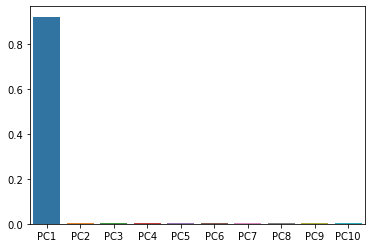

In [58]:
# scaler = StandardScaler()
# df_graph2vec_scaled = scaler.fit_transform(df_graph2vec)

df_graph2vec_scaled = df_graph2vec

pca = PCA().fit(df_graph2vec_scaled)
pc = pca.transform(df_graph2vec_scaled)

var = pca.explained_variance_[:10] / sum(pca.explained_variance_)
labels = ['PC'+ str(i) for i in range(1,11)]

print(sum(pca.explained_variance_))
sns.barplot(labels, var)

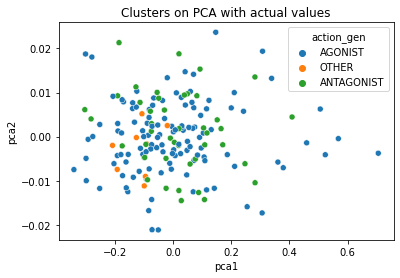

In [59]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_graph2vec_scaled)
results = pd.DataFrame(reduced_data, columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['action_gen'], data=results)
plt.title('Clusters on PCA with actual values')
plt.show()

In [60]:
clustering_kmeans = KMeans(n_clusters=3)
results['clusters'] = clustering_kmeans.fit_predict(results)
results['clusters']

0      1
1      1
2      0
3      1
4      1
      ..
166    1
167    1
168    0
169    1
170    0
Name: clusters, Length: 171, dtype: int32

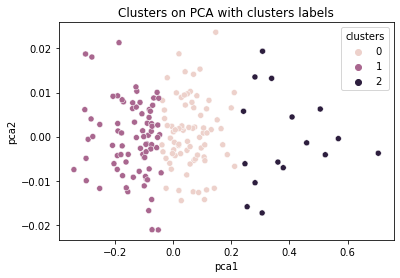

In [61]:
sns.scatterplot(x="pca1", y="pca2", hue=results['clusters'], data=results)
plt.title('Clusters on PCA with clusters labels')
plt.show()

In [62]:
print(results['clusters'].value_counts())
cluster_dict = dict(results['clusters'].value_counts())
cluster_dict = dict(sorted(cluster_dict.items(), key=lambda item: item[1], reverse=True)).keys()
cluster_dict = list(cluster_dict)

results['action_gen'] = df['action_gen']
results['action_gen_cluster'] = results['clusters'].map({cluster_dict[0]: 'AGONIST', cluster_dict[1]: 'ANTAGONIST', cluster_dict[2]: 'OTHER'})

print('rand_score: ', rand_score(results.action_gen, results.clusters))
print('Accuracy', results[results.action_gen == results.action_gen_cluster].shape[0] / results.shape[0])

1    78
0    77
2    16
Name: clusters, dtype: int64
rand_score:  0.48813209494324045
Accuracy 0.4678362573099415


## Cluster directly

In [63]:
clustering_kmeans = KMeans(n_clusters=3)
df_graph2vec['clusters'] = clustering_kmeans.fit_predict(df_graph2vec_scaled)
df_graph2vec['clusters']

0      1
1      1
2      0
3      1
4      1
      ..
166    1
167    1
168    0
169    1
170    0
Name: clusters, Length: 171, dtype: int32

In [64]:
# sort keys based on number of values in each clusters
print(df_graph2vec['clusters'].value_counts())
cluster_dict = dict(df_graph2vec['clusters'].value_counts())
cluster_dict = dict(sorted(cluster_dict.items(), key=lambda item: item[1], reverse=True)).keys()
cluster_dict = list(cluster_dict)

df_graph2vec['action_gen'] = df['action_gen']
df_graph2vec['action_gen_cluster'] = df_graph2vec['clusters'].map({cluster_dict[0]: 'AGONIST', cluster_dict[1]: 'ANTAGONIST', cluster_dict[2]: 'OTHER'})

print('rand_score: ', rand_score(df_graph2vec.action_gen, df_graph2vec.action_gen_cluster))
print('Accuracy', df_graph2vec[df_graph2vec.action_gen == df_graph2vec.action_gen_cluster].shape[0] / df_graph2vec.shape[0])

1    78
0    77
2    16
Name: clusters, dtype: int64
rand_score:  0.48813209494324045
Accuracy 0.4678362573099415
